## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib
import folium
import json
import os

## Import Data Set and JSON file

In [2]:
path=r'C:\Users\sasze\Documents\Careerfoundry Data Analytics\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_pollution_cleaned.csv'), index_col = False)

In [4]:
country_geo=r'C:\Users\sasze\Documents\Careerfoundry Data Analytics\Achievement 6\02 Data\Original Data\us-states.json'

In [5]:
country_geo

'C:\\Users\\sasze\\Documents\\Careerfoundry Data Analytics\\Achievement 6\\02 Data\\Original Data\\us-states.json'

## Data Wrangling

In [6]:
df.head()

,Unnamed: 0,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,1,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,2,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,3,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,4,Arizona,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [7]:
#Remove Unnamed
df=df.drop(columns='Unnamed: 0')

In [8]:
df.head()

,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [9]:
#Missing values
df.isnull().sum()

State                     0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              522863
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               523036
dtype: int64

Because my focus will be on the means, these missing values will not affect the data.

## Checking for Extreme Values

<AxesSubplot:xlabel='NO2 Mean', ylabel='Count'>

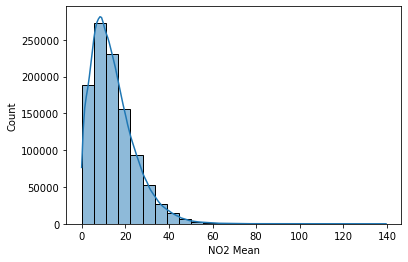

In [10]:
sns.histplot(df['NO2 Mean'], bins=25, kde=True)

<AxesSubplot:xlabel='O3 Mean', ylabel='Count'>

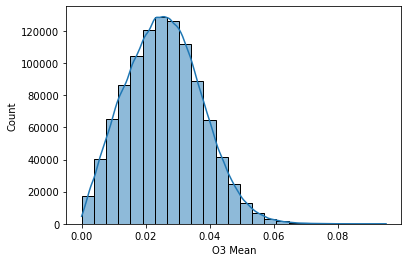

In [11]:
sns.histplot(df['O3 Mean'], bins=25, kde=True)

<AxesSubplot:xlabel='SO2 Mean', ylabel='Count'>

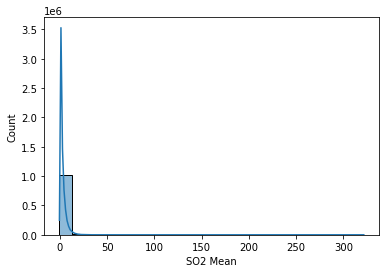

In [12]:
sns.histplot(df['SO2 Mean'], bins=25, kde=True)

<AxesSubplot:xlabel='CO Mean', ylabel='Count'>

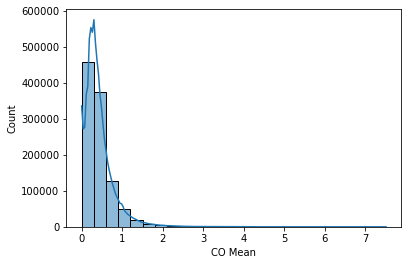

In [13]:
sns.histplot(df['CO Mean'], bins=25, kde=True)

We will just be focusing on NO2 and CO.

## Choropleth

In [14]:
data_to_plot = df[['State','NO2 Mean', 'CO Mean']]

In [22]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data=country_geo,
    data=data_to_plot,
    columns=['State', 'NO2 Mean', 'CO Mean'],
    key_on='feature.properties.name',
    fill_color='YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2_CO_Mean").add_to(map)
folium.LayerControl().add_to(map)
    


In [23]:
map

## Analysis

I had added a new question about the NO2 and CO Levels in every state and this answers my questions of the states that have the most gas emmissions from the two.

This doesn't add anymore questions as this responds to the questions I had previously. But I do want to ask why there are some states that have no gas emmissions? This might be because these states are not in the system but could not be checked. This map accurately shows the major gas emmissions as NO2 and CO contribute the most to the pollution.